In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
import pandas as pd

all_df = pd.read_csv(r'test_sale.csv').head()
all_df

,Unnamed: 0,DateTime,Final price,Sale Start,Sale End,Origin Price,Sale Rate,Ready to Sale,Sale Period,Game_ID,Start Year,Start month,Start day,End Year,End month,End day
0,0,2015-11-25 18:24:05,5250.0,2015-11-25 18:24:05,2015-12-01 18:39:34,10500.0,0.50,21 days 00:54:41,6 days 00:15:29,10,2015,11,25,2015,12,1
1,1,2015-12-22 19:34:15,5250.0,2015-12-22 19:34:15,2016-01-04 19:21:20,10500.0,0.50,32 days 00:10:02,12 days 23:47:05,10,2015,12,22,2016,1,4
2,2,2016-02-05 19:31:22,2620.0,2016-02-05 19:31:22,2016-02-12 18:47:14,10500.0,0.75,285 days 01:47:07,6 days 23:15:52,10,2016,2,5,2016,2,12
3,3,2016-11-23 20:34:21,2620.0,2016-11-23 20:34:21,2016-12-01 16:14:00,10500.0,0.75,21 days 01:44:51,7 days 19:39:39,10,2016,11,23,2016,12,1
4,4,2016-12-22 17:58:51,2620.0,2016-12-22 17:58:51,2017-01-02 18:23:32,10500.0,0.75,171 days 02:48:31,11 days 00:24:41,10,2016,12,22,2017,1,2


In [2]:
import pandas as pd
from datetime import datetime

all_df = pd.read_csv(r'test_sale.csv').head()
game_info_df = pd.read_csv(r'static_data\game_info.csv')
all_sale_df = pd.read_csv('static_data\전체세일.csv').head()

game_info_df = game_info_df.drop(columns=['DLC_Game'])
#pd.to_datetime(datetime.today()) - pd.to_datetime(game_info_df['release date'])
test_day = game_info_df['release date'].iloc[0]

game_info_df['release date'] = game_info_df['release date'].str.replace(',','')
temp_index = game_info_df[game_info_df['release date'].apply(lambda x : len(x.split())) < 3].index
game_info_df['release date'].iloc[temp_index] = '1 ' + game_info_df['release date'].iloc[temp_index]

game_info_df['last Day'] = (pd.to_datetime(datetime.today()) - pd.to_datetime(game_info_df['release date'])).apply(lambda x : str(x).split()[0])
game_info_df = game_info_df.drop(columns=['Unnamed: 0','Unnamed: 0.2','Name','release date'])
game_info_df['Company'] = game_info_df['Company'].apply(lambda x : x.split(',')[0])

df = pd.read_csv(r'test_sale.csv')
df['Ready to Sale Day'] = df['Ready to Sale'].apply(lambda x : x.split()[0])
df['Sale Peroid Day'] = df['Sale Period'].apply(lambda x : int(x.split()[0])+1)

temp_df = df.drop(columns=['Unnamed: 0','Ready to Sale','Origin Price','Sale Rate','Sale Period','Sale End','DateTime'])

test_df = pd.merge(temp_df, game_info_df,left_on='Game_ID', right_on='AppID', how='right')

#test_df = test_df.drop(['Start time','End time'],axis=1)


test_df['Start Year'] = test_df['Start Year'].astype(object)
test_df['Start month'] = test_df['Start month'].astype(object)
test_df['Start day'] = test_df['Start day'].astype(object)

test_df['End Year'] = test_df['End Year'].astype(object)
test_df['End month'] = test_df['End month'].astype(object)
test_df['End day'] = test_df['End day'].astype(object)
test_df['Sale Start'] = pd.to_datetime(test_df['Sale Start'])

test_df['price'] = test_df['price'].str.extract('(\d+)')
test_df['price'] = test_df['price'].fillna(0)

test_df['price'] = test_df['price'].astype(int)
test_df['last Day'] = test_df['last Day'].astype(int)
test_df['price'] = test_df['price'].astype(int)

test_df['Ready to Sale Day'] = test_df['Ready to Sale Day'].fillna(0)
test_df['Sale Peroid Day'] = test_df['Sale Peroid Day'].fillna(0)

test_df = test_df.dropna()
test_df = test_df.drop(['AppID'],axis=1)
test_df['Game_ID'] = test_df['Game_ID'].astype(int)
test_df = test_df.reset_index()
test_df = test_df.drop(['index'],axis=1)

test_df['Final price'] = test_df['Final price'].astype(int)
test_df['Sale Peroid Day'] = test_df['Sale Peroid Day'].astype(int)
test_df['Ready to Sale Day'] = test_df['Ready to Sale Day'].astype(int)

# test_df = test_df.drop(['End day','Start day'],axis=1)
test_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20283 entries, 0 to 20282
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Final price            20283 non-null  int32         
 1   Sale Start             20283 non-null  datetime64[ns]
 2   Game_ID                20283 non-null  int32         
 3   Start Year             20283 non-null  object        
 4   Start month            20283 non-null  object        
 5   Start day              20283 non-null  object        
 6   End Year               20283 non-null  object        
 7   End month              20283 non-null  object        
 8   End day                20283 non-null  object        
 9   Ready to Sale Day      20283 non-null  int32         
 10  Sale Peroid Day        20283 non-null  int32         
 11  Unnamed: 0.1           20283 non-null  int64         
 12  Developer              20283 non-null  object        
 13  C

C:\Users\Hiker\AppData\Local\Temp\ipykernel_16360\3290557466.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_info_df['release date'].iloc[temp_index] = '1 ' + game_info_df['release date'].iloc[temp_index]


In [3]:
test_df

,Final price,Sale Start,Game_ID,Start Year,Start month,Start day,End Year,End month,End day,Ready to Sale Day,...,Unnamed: 0.1,Developer,Company,price,latest rating,latest rating counter,all rating,all rating counter,category,last Day
0,5250,2015-11-25 18:24:05,10,2015.0,11.0,25.0,2015.0,12.0,1.0,21,...,0,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
1,5250,2015-12-22 19:34:15,10,2015.0,12.0,22.0,2016.0,1.0,4.0,32,...,0,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
2,2620,2016-02-05 19:31:22,10,2016.0,2.0,5.0,2016.0,2.0,12.0,285,...,0,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
3,2620,2016-11-23 20:34:21,10,2016.0,11.0,23.0,2016.0,12.0,1.0,21,...,0,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
4,2620,2016-12-22 17:58:51,10,2016.0,12.0,22.0,2017.0,1.0,2.0,171,...,0,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20278,15700,2023-06-29 17:29:49,969990,2023.0,6.0,29.0,2023.0,7.0,13.0,27,...,676,Purple Lamp,['THQ Nordic'],31400,Very Positive,90,Very Positive,12061,"['Action', 'Adventure', 'Casual']",1319
20279,7850,2023-08-10 17:05:06,969990,2023.0,8.0,10.0,2023.0,8.0,17.0,81,...,676,Purple Lamp,['THQ Nordic'],31400,Very Positive,90,Very Positive,12061,"['Action', 'Adventure', 'Casual']",1319
20280,6280,2023-11-06 18:22:31,969990,2023.0,11.0,6.0,2023.0,11.0,13.0,7,...,676,Purple Lamp,['THQ Nordic'],31400,Very Positive,90,Very Positive,12061,"['Action', 'Adventure', 'Casual']",1319
20281,7850,2023-11-21 18:12:17,969990,2023.0,11.0,21.0,2023.0,11.0,28.0,22,...,676,Purple Lamp,['THQ Nordic'],31400,Very Positive,90,Very Positive,12061,"['Action', 'Adventure', 'Casual']",1319


In [4]:
test_df = test_df.drop(columns=['Sale Start','Unnamed: 0.1'])


In [5]:
test_df

,Final price,Game_ID,Start Year,Start month,Start day,End Year,End month,End day,Ready to Sale Day,Sale Peroid Day,Developer,Company,price,latest rating,latest rating counter,all rating,all rating counter,category,last Day
0,5250,10,2015.0,11.0,25.0,2015.0,12.0,1.0,21,7,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
1,5250,10,2015.0,12.0,22.0,2016.0,1.0,4.0,32,13,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
2,2620,10,2016.0,2.0,5.0,2016.0,2.0,12.0,285,7,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
3,2620,10,2016.0,11.0,23.0,2016.0,12.0,1.0,21,8,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
4,2620,10,2016.0,12.0,22.0,2017.0,1.0,2.0,171,12,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20278,15700,969990,2023.0,6.0,29.0,2023.0,7.0,13.0,27,14,Purple Lamp,['THQ Nordic'],31400,Very Positive,90,Very Positive,12061,"['Action', 'Adventure', 'Casual']",1319
20279,7850,969990,2023.0,8.0,10.0,2023.0,8.0,17.0,81,7,Purple Lamp,['THQ Nordic'],31400,Very Positive,90,Very Positive,12061,"['Action', 'Adventure', 'Casual']",1319
20280,6280,969990,2023.0,11.0,6.0,2023.0,11.0,13.0,7,8,Purple Lamp,['THQ Nordic'],31400,Very Positive,90,Very Positive,12061,"['Action', 'Adventure', 'Casual']",1319
20281,7850,969990,2023.0,11.0,21.0,2023.0,11.0,28.0,22,8,Purple Lamp,['THQ Nordic'],31400,Very Positive,90,Very Positive,12061,"['Action', 'Adventure', 'Casual']",1319


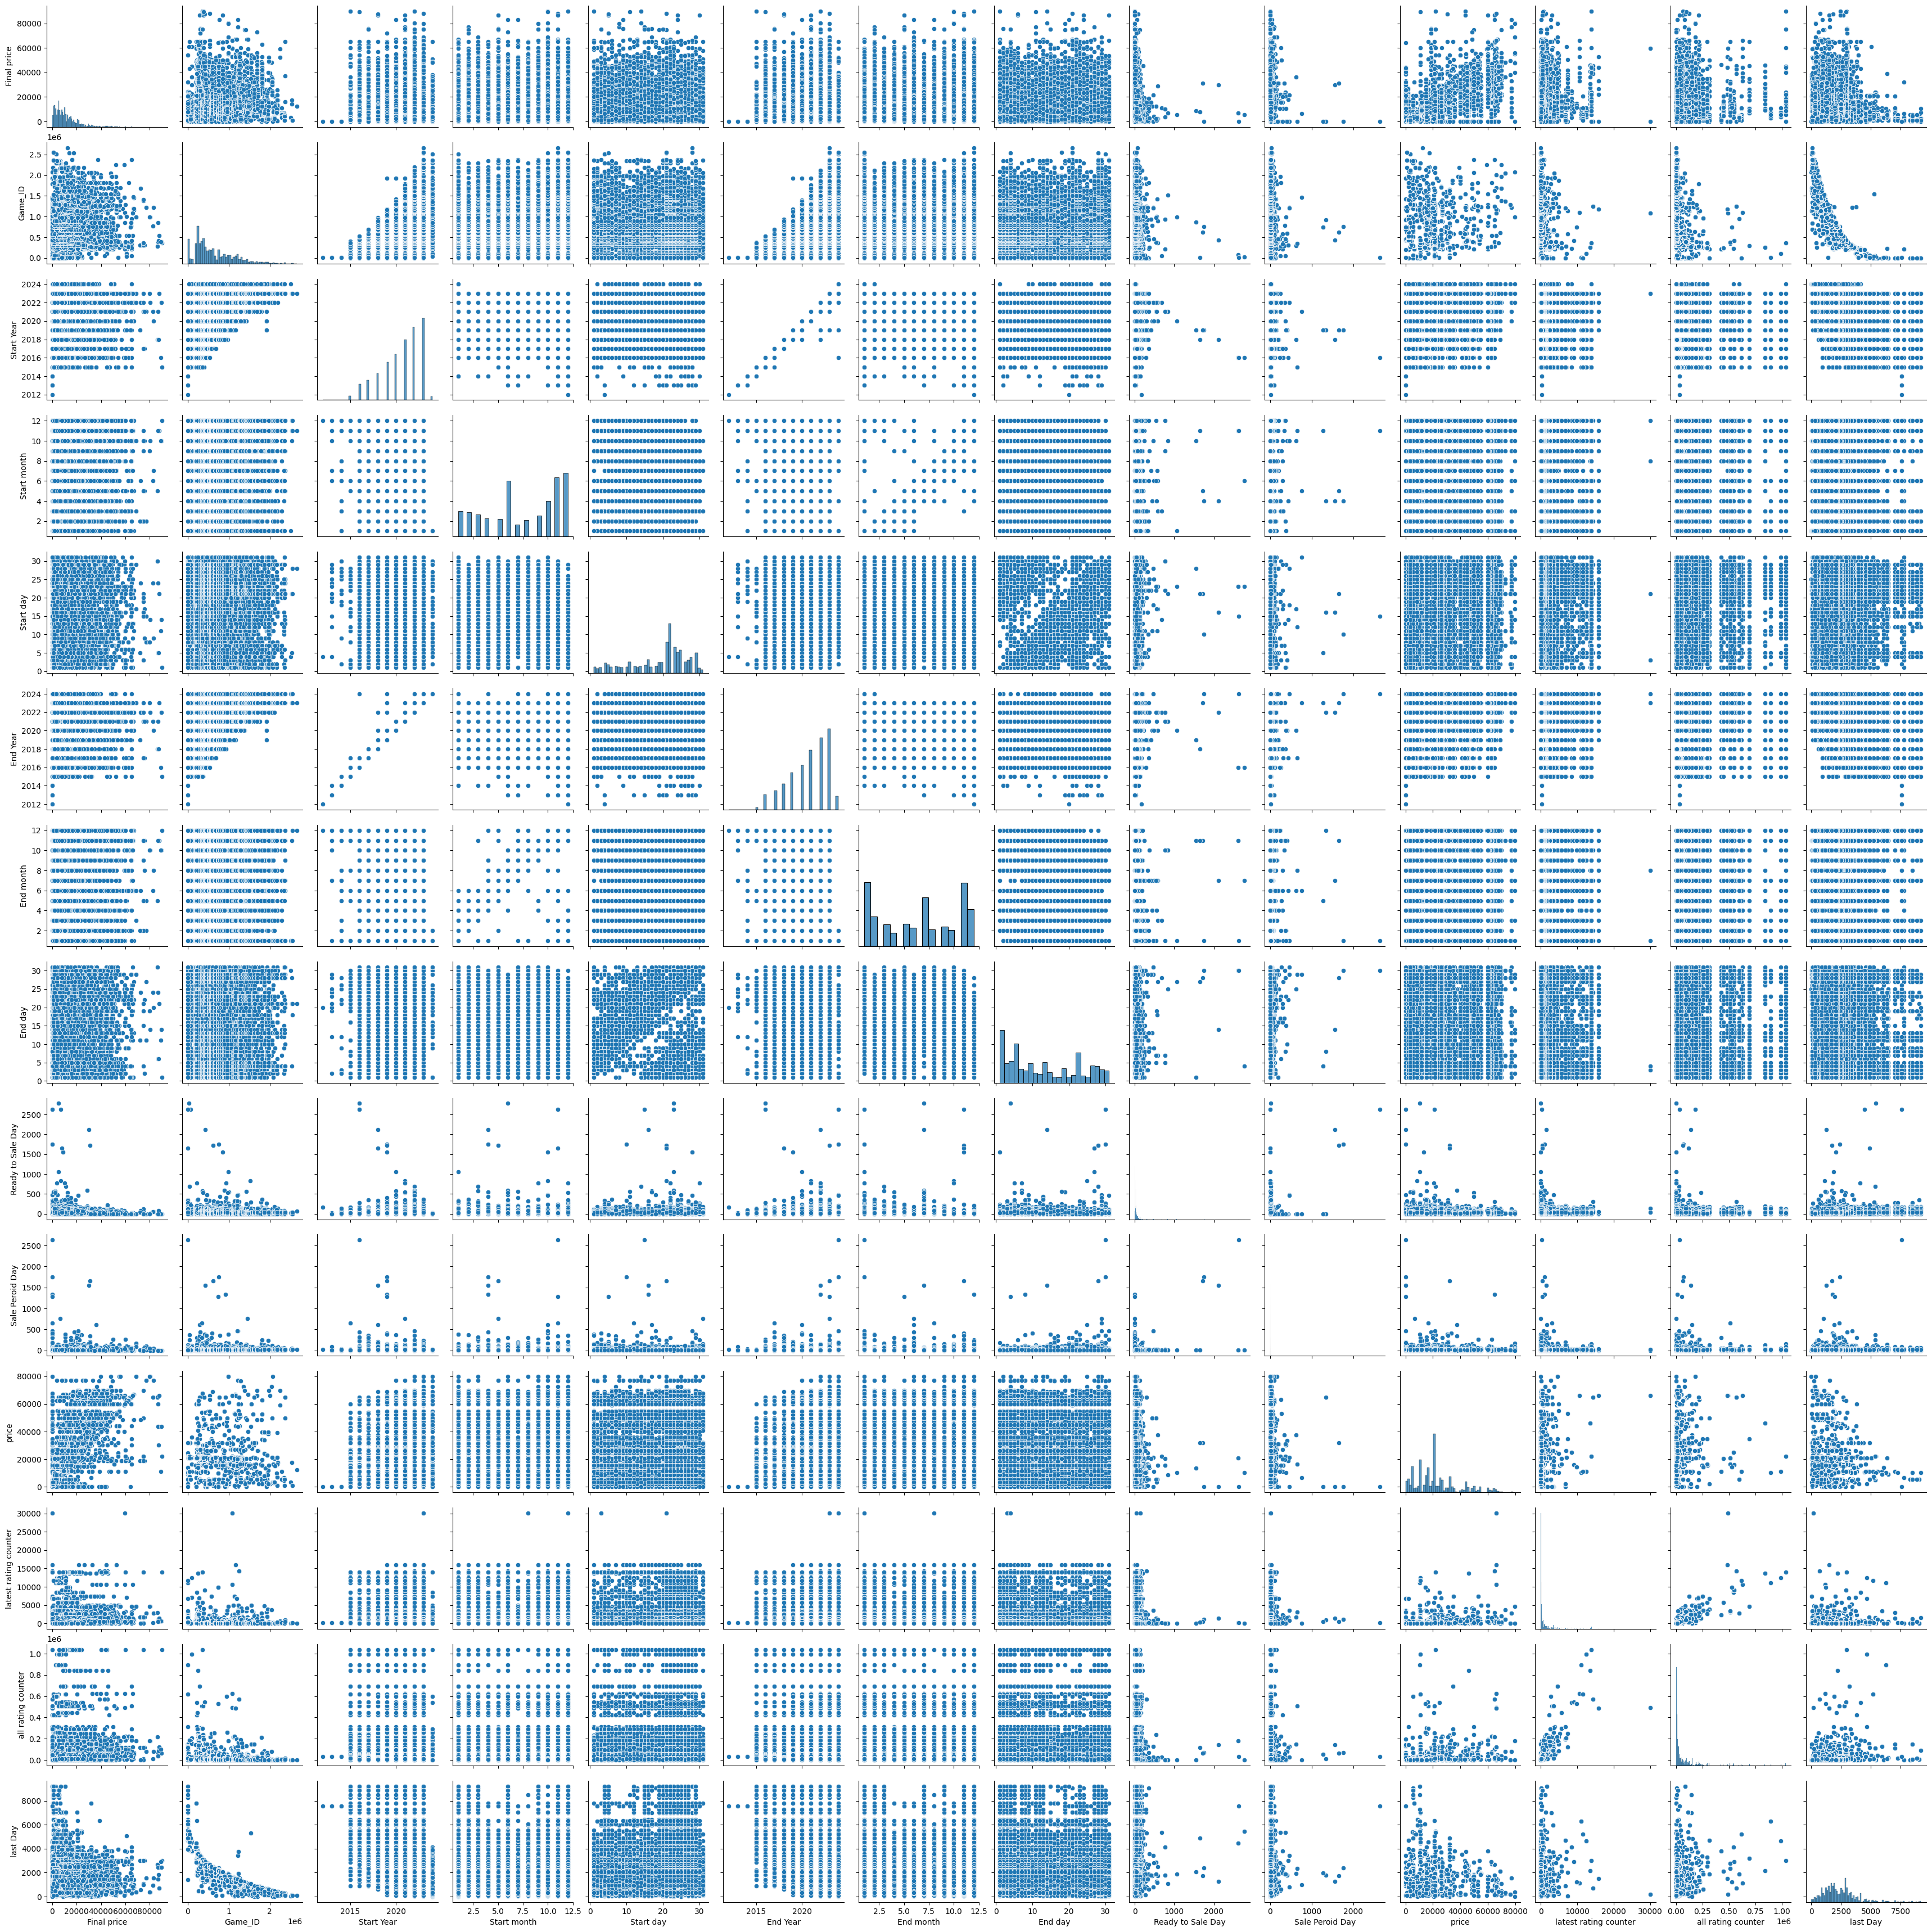

In [8]:
sns.pairplot(test_df)

In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20283 entries, 0 to 20282
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Final price            20283 non-null  int32 
 1   Game_ID                20283 non-null  int32 
 2   Start Year             20283 non-null  object
 3   Start month            20283 non-null  object
 4   Start day              20283 non-null  object
 5   End Year               20283 non-null  object
 6   End month              20283 non-null  object
 7   End day                20283 non-null  object
 8   Ready to Sale Day      20283 non-null  int32 
 9   Sale Peroid Day        20283 non-null  int32 
 10  Developer              20283 non-null  object
 11  Company                20283 non-null  object
 12  price                  20283 non-null  int32 
 13  latest rating          20283 non-null  object
 14  latest rating counter  20283 non-null  int64 
 15  all rating         

In [10]:
test_df.isnull().sum()

Final price              0
Game_ID                  0
Start Year               0
Start month              0
Start day                0
End Year                 0
End month                0
End day                  0
Ready to Sale Day        0
Sale Peroid Day          0
Developer                0
Company                  0
price                    0
latest rating            0
latest rating counter    0
all rating               0
all rating counter       0
category                 0
last Day                 0
dtype: int64

In [11]:
onehot_df = pd.get_dummies(test_df)

In [12]:
onehot_df

,Final price,Game_ID,Ready to Sale Day,Sale Peroid Day,price,latest rating counter,all rating counter,last Day,Start Year_2012.0,Start Year_2013.0,...,"category_['Racing', 'Simulation']","category_['Racing', 'Sports']",category_['Racing'],"category_['Simulation', 'Sports', 'Strategy']","category_['Simulation', 'Strategy', 'Early Access']","category_['Simulation', 'Strategy']",category_['Simulation'],category_['Strategy'],category_['Utilities'],category_[]
0,5250,10,21,7,10500,1278,146415,8493,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5250,10,32,13,10500,1278,146415,8493,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2620,10,285,7,10500,1278,146415,8493,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2620,10,21,8,10500,1278,146415,8493,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2620,10,171,12,10500,1278,146415,8493,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20278,15700,969990,27,14,31400,90,12061,1319,False,False,...,False,False,False,False,False,False,False,False,False,False
20279,7850,969990,81,7,31400,90,12061,1319,False,False,...,False,False,False,False,False,False,False,False,False,False
20280,6280,969990,7,8,31400,90,12061,1319,False,False,...,False,False,False,False,False,False,False,False,False,False
20281,7850,969990,22,8,31400,90,12061,1319,False,False,...,False,False,False,False,False,False,False,False,False,False


# 전처리 끝

In [13]:
len(onehot_df)

20283

<Axes: ylabel='Frequency'>

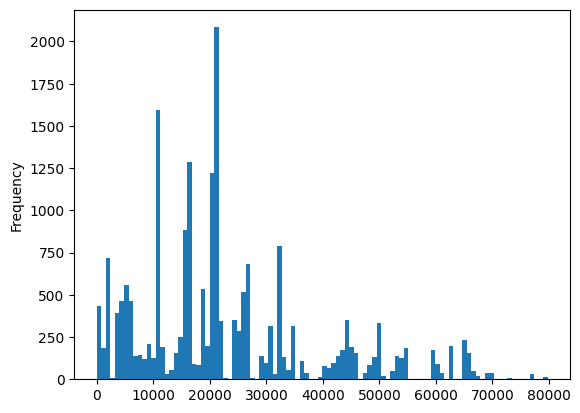

In [14]:
onehot_df['price'].plot(kind='hist', bins=100)

<Axes: ylabel='Frequency'>

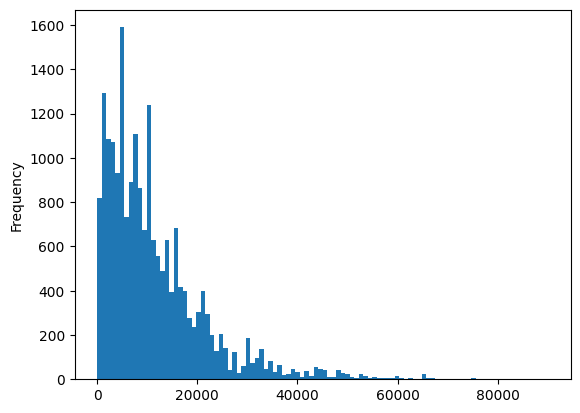

In [15]:
onehot_df['Final price'].plot(kind='hist', bins=100)

In [16]:
# 타겟 설정
y = onehot_df['Final price']
x = onehot_df.drop('Final price', axis=1)

In [17]:
# 데이터를 shuffle 해서 비율에 맞춰 나누기 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=111)

In [19]:
%pip install lightgbm

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Hiker\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [18]:
%pip install xgboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Hiker\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [25]:
%pip install catboost

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Hiker\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [20]:
# 알고리즘 선택 : 통합버전
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

lr = LinearRegression()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
etr = ExtraTreesRegressor()
dtr = DecisionTreeRegressor()
xgbr = XGBRegressor()
lgbmr = LGBMRegressor()
model = CatBoostRegressor(iterations=1000,  # 반복 횟수
                           learning_rate=0.1,  # 학습률
                           depth=6)  # 트리의 최대 깊이

from sklearn.linear_model import Ridge, Lasso, ElasticNet

rid = Ridge()
las = Lasso()
ele = ElasticNet()

In [21]:
models = [lr, rid, las, ele, rfr, gbr, etr, dtr, xgbr, lgbmr]

In [22]:
# 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [24]:
# 날짜 추가한 데이터 학습, 예측, 평가
for m in models:
  m.fit(x_train.values, y_train)
  preds = m.predict(x_test.values)
  score = r2_score(y_test, preds)
  mse = mean_squared_error(y_test, preds)
  mas = mean_absolute_error(y_test, preds)
  print(m.__class__.__name__)
  print(score)
  print(mse)
  print(mas)
  print('------------------------')

LinearRegression
0.6447851017351585
39475282.017370395
3643.8031359069123
------------------------
Ridge
0.6464966604677602
39285075.2890243
3650.819522903947
------------------------


C:\Users\Hiker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.920e+11, tolerance: 1.740e+08
  model = cd_fast.enet_coordinate_descent(


Lasso
0.6439427376791174
39568894.528658494
3700.644474867248
------------------------
ElasticNet
0.5125173735430629
54174287.88025782
4793.186076297073
------------------------
RandomForestRegressor
0.8067244682312922
21478846.075702827
2024.297820932662
------------------------
GradientBoostingRegressor
0.6865567502771032
34833169.272160254
3599.1842320863325
------------------------
ExtraTreesRegressor
0.8016682398088574
22040748.3041703
1954.9327409415826
------------------------
DecisionTreeRegressor
0.6711854856275161
36541388.74710377
2403.1838797140745
------------------------
XGBRegressor
0.788359774598662
23519727.423450172
2521.8482561231335
------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001283 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2801
[LightGBM] [Info] Number of data points in the train s

In [28]:
# RandomForestRegressor 파라미터 조정
from sklearn.model_selection import GridSearchCV


In [29]:

rfr = RandomForestRegressor()

rfr_param_grid = {
    'n_estimators': [50, 100, 150],  # 트리의 개수
    'max_depth': [None, 10, 20, 30],  # 트리의 최대 깊이
    'min_samples_split': [2, 5, 10],  # 노드를 분할하기 위한 최소한의 샘플 개수
    'min_samples_leaf': [1, 2, 4],  # 리프 노드가 되기 위한 최소한의 샘플 개수
    'max_features': ['auto', 'sqrt', 'log2'],  # 각 노드에서 분할에 사용할 특성의 최대 개수
    'random_state': [42]  # 랜덤 시드
}

In [ ]:
# GridSearchCV를 사용하여 최적의 조합을 찾음

In [32]:
grid_search = GridSearchCV(estimator=rfr, param_grid=rfr_param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x_train.values, y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


C:\Users\Hiker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Hiker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Hiker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-

GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150], 'random_state': [42]},
             verbose=2)

In [33]:
# 최적의 파라미터 값 출력
print("Best parameters:", grid_search.best_params_)

Best parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 150, 'random_state': 42}


In [ ]:
# 평가 방법 추가
# 피어슨 상관 계수 계산
pearson_corr = df['X'].corr(df['Y'])

print("피어슨 상관 계수:", pearson_corr)

In [102]:
3 # 추가 
%pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Hiker\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [104]:
from sklearn.ensemble import ExtraTreesRegressor

# 모델 초기화
etr = ExtraTreesRegressor()

In [107]:
model=[etr]

In [108]:
for m in model:
  m.fit(x_train.values, y_train)
  preds = m.predict(x_test.values)
  score = r2_score(y_test, preds)
  mse = mean_squared_error(y_test, preds)
  mas = mean_absolute_error(y_test, preds)
  print(m.__class__.__name__)
  print(score)
  print(mse)
  print(mas)
  print('------------------------')

ExtraTreesRegressor
0.8002935521768924
22193518.30965906
1925.735293731
------------------------


In [ ]:
# 추가 2

In [110]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [111]:
model=[dtr]

In [112]:
for m in model:
  m.fit(x_train.values, y_train)
  preds = m.predict(x_test.values)
  score = r2_score(y_test, preds)
  mse = mean_squared_error(y_test, preds)
  mas = mean_absolute_error(y_test, preds)
  print(m.__class__.__name__)
  print(score)
  print(mse)
  print(mas)
  print('------------------------')

DecisionTreeRegressor
0.7054099525797344
32737999.61159039
2307.6435789992606
------------------------


In [114]:
# 추가 3
from catboost import CatBoostRegressor

In [115]:
catr = CatBoostRegressor(iterations=1000,  # 반복 횟수
                           learning_rate=0.1,  # 학습률
                           depth=6)  # 트리의 최대 깊이

In [116]:
model=[catr]

In [117]:
for m in model:
  m.fit(x_train.values, y_train)
  preds = m.predict(x_test.values)
  score = r2_score(y_test, preds)
  mse = mean_squared_error(y_test, preds)
  mas = mean_absolute_error(y_test, preds)
  print(m.__class__.__name__)
  print(score)
  print(mse)
  print(mas)
  print('------------------------')

0:	learn: 9845.4532440	total: 32.4ms	remaining: 32.4s
1:	learn: 9391.0067752	total: 43.6ms	remaining: 21.8s
2:	learn: 9003.2583555	total: 52ms	remaining: 17.3s
3:	learn: 8666.9409010	total: 58.9ms	remaining: 14.7s
4:	learn: 8370.3237777	total: 65.4ms	remaining: 13s
5:	learn: 8115.9342978	total: 71.5ms	remaining: 11.8s
6:	learn: 7892.9947181	total: 77.5ms	remaining: 11s
7:	learn: 7685.1672031	total: 83.3ms	remaining: 10.3s
8:	learn: 7508.4752860	total: 89.5ms	remaining: 9.85s
9:	learn: 7353.8896402	total: 95.4ms	remaining: 9.45s
10:	learn: 7228.5780912	total: 101ms	remaining: 9.12s
11:	learn: 7107.1284238	total: 107ms	remaining: 8.85s
12:	learn: 7003.4945174	total: 113ms	remaining: 8.62s
13:	learn: 6902.8863715	total: 120ms	remaining: 8.43s
14:	learn: 6824.7945051	total: 126ms	remaining: 8.29s
15:	learn: 6752.0809417	total: 133ms	remaining: 8.17s
16:	learn: 6680.3940689	total: 139ms	remaining: 8.05s
17:	learn: 6616.5259714	total: 145ms	remaining: 7.9s
18:	learn: 6550.4562662	total: 150m

In [106]:
models = [lr, rid, las, ele, rfr, gbr, xgbr, lgbmr]
# models = [lr, rfr, gbr, xgbr, lgbmr]

In [83]:
# 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [84]:
for m in models:
  m.fit(x_train.values, y_train)
  preds = m.predict(x_test.values)
  score = r2_score(y_test, preds)
  mse = mean_squared_error(y_test, preds)
  mas = mean_absolute_error(y_test, preds)
  print(m.__class__.__name__)
  print(score)
  print(mse)
  print(mas)
  print('------------------------')

LinearRegression
0.6479524391700485
39123293.57573348
3591.799445070204
------------------------
Ridge
0.650088501948898
38885911.41351622
3593.7183343165316
------------------------


C:\Users\Hiker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.026e+11, tolerance: 1.740e+08
  model = cd_fast.enet_coordinate_descent(


Lasso
0.6470630548180774
39222131.48565054
3646.7716776081693
------------------------
ElasticNet
0.5122354355565222
54205619.847426064
4794.160055986337
------------------------
RandomForestRegressor
0.818648877286564
20153678.09247151
1974.2424431024567
------------------------
GradientBoostingRegressor
0.6835387108802164
35168566.117601156
3615.3626353724294
------------------------
XGBRegressor
0.7834628073507448
24063930.84533826
2537.3990103872297
------------------------
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001483 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2677
[LightGBM] [Info] Number of data points in the train set: 16226, number of used features: 648
[LightGBM] [Info] Start training from score 11437.042031
LGBMRegressor
0.7915273263583196
23167715.163750764
2588.9558483784353
------------------------


In [ ]:
for m in models:
  m.fit(x_train, y_train)
  preds = m.predict(x_test)
  score = r2_score(y_test, preds)
  mse = mean_squared_error(y_test, preds)
  mas = mean_absolute_error(y_test, preds)
  print(m.__class__.__name__)
  print(score)
  print(mse)
  print(mas)
  print('------------------------')

C:\Users\Hiker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


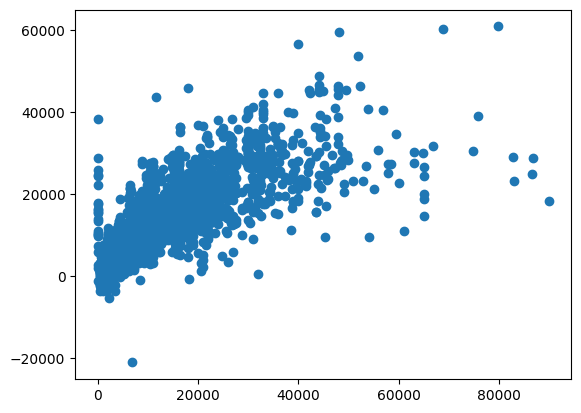

In [74]:
# LinearRegression 시각화 
y_preds = lr.predict(x_test)
plt.scatter(y_test, y_preds)

C:\Users\Hiker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


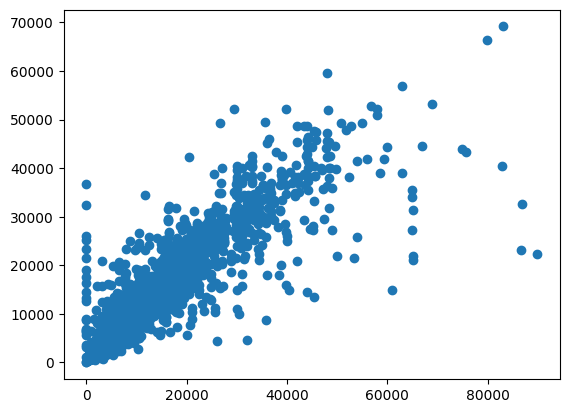

In [75]:
# RandomForestRegressor 시각화 
y_preds = rfr.predict(x_test)
plt.scatter(y_test, y_preds)

# rfr = RandomForestRegressor가 0.81로 가장 좋게 나옴

In [ ]:
# 교차검증

In [118]:
from sklearn.model_selection import cross_validate

In [119]:
scores = cross_validate(rfr, x, y, cv=5)
scores

{'fit_time': array([43.09699368, 40.84603834, 38.46938491, 41.63622093, 39.46857405]),
 'score_time': array([0.06582308, 0.06482649, 0.05884242, 0.07180619, 0.0678184 ]),
 'test_score': array([0.6064293 , 0.307748  , 0.69473093, 0.53438546, 0.57751404])}

In [120]:
scores['test_score'].mean()

0.5441615465263064

# 마지막 1개 데이터 맞추기

In [121]:
# 처음부터 들여오기
import pandas as pd

all_df = pd.read_csv(r'test_sale.csv').head()
all_df


,Unnamed: 0,DateTime,Final price,Sale Start,Sale End,Origin Price,Sale Rate,Ready to Sale,Sale Period,Game_ID,Start Year,Start month,Start day,End Year,End month,End day
0,0,2015-11-25 18:24:05,5250.0,2015-11-25 18:24:05,2015-12-01 18:39:34,10500.0,0.50,21 days 00:54:41,6 days 00:15:29,10,2015,11,25,2015,12,1
1,1,2015-12-22 19:34:15,5250.0,2015-12-22 19:34:15,2016-01-04 19:21:20,10500.0,0.50,32 days 00:10:02,12 days 23:47:05,10,2015,12,22,2016,1,4
2,2,2016-02-05 19:31:22,2620.0,2016-02-05 19:31:22,2016-02-12 18:47:14,10500.0,0.75,285 days 01:47:07,6 days 23:15:52,10,2016,2,5,2016,2,12
3,3,2016-11-23 20:34:21,2620.0,2016-11-23 20:34:21,2016-12-01 16:14:00,10500.0,0.75,21 days 01:44:51,7 days 19:39:39,10,2016,11,23,2016,12,1
4,4,2016-12-22 17:58:51,2620.0,2016-12-22 17:58:51,2017-01-02 18:23:32,10500.0,0.75,171 days 02:48:31,11 days 00:24:41,10,2016,12,22,2017,1,2


In [123]:
import pandas as pd
from datetime import datetime

all_df = pd.read_csv(r'test_sale.csv').head()
game_info_df = pd.read_csv(r'static_data\game_info.csv')
all_sale_df = pd.read_csv('static_data\전체세일.csv').head()

game_info_df = game_info_df.drop(columns=['DLC_Game'])
#pd.to_datetime(datetime.today()) - pd.to_datetime(game_info_df['release date'])
test_day = game_info_df['release date'].iloc[0]

game_info_df['release date'] = game_info_df['release date'].str.replace(',','')
temp_index = game_info_df[game_info_df['release date'].apply(lambda x : len(x.split())) < 3].index
game_info_df['release date'].iloc[temp_index] = '1 ' + game_info_df['release date'].iloc[temp_index]

game_info_df['last Day'] = (pd.to_datetime(datetime.today()) - pd.to_datetime(game_info_df['release date'])).apply(lambda x : str(x).split()[0])
game_info_df = game_info_df.drop(columns=['Unnamed: 0','Unnamed: 0.2','Name','release date'])
game_info_df['Company'] = game_info_df['Company'].apply(lambda x : x.split(',')[0])

df = pd.read_csv(r'test_sale.csv')
df['Ready to Sale Day'] = df['Ready to Sale'].apply(lambda x : x.split()[0])
df['Sale Peroid Day'] = df['Sale Period'].apply(lambda x : int(x.split()[0])+1)

temp_df = df.drop(columns=['Unnamed: 0','Ready to Sale','Origin Price','Sale Rate','Sale Period','Sale End','DateTime'])

test_df = pd.merge(temp_df, game_info_df,left_on='Game_ID', right_on='AppID', how='right')

#test_df = test_df.drop(['Start time','End time'],axis=1)


test_df['Start Year'] = test_df['Start Year'].astype(object)
test_df['Start month'] = test_df['Start month'].astype(object)
test_df['Start day'] = test_df['Start day'].astype(object)

test_df['End Year'] = test_df['End Year'].astype(object)
test_df['End month'] = test_df['End month'].astype(object)
test_df['End day'] = test_df['End day'].astype(object)
test_df['Sale Start'] = pd.to_datetime(test_df['Sale Start'])

test_df['price'] = test_df['price'].str.extract('(\d+)')
test_df['price'] = test_df['price'].fillna(0)

test_df['price'] = test_df['price'].astype(int)
test_df['last Day'] = test_df['last Day'].astype(int)
test_df['price'] = test_df['price'].astype(int)

test_df['Ready to Sale Day'] = test_df['Ready to Sale Day'].fillna(0)
test_df['Sale Peroid Day'] = test_df['Sale Peroid Day'].fillna(0)

test_df = test_df.dropna()
test_df = test_df.drop(['AppID'],axis=1)
test_df['Game_ID'] = test_df['Game_ID'].astype(int)
test_df = test_df.reset_index()
test_df = test_df.drop(['index'],axis=1)

test_df['Final price'] = test_df['Final price'].astype(int)
test_df['Sale Peroid Day'] = test_df['Sale Peroid Day'].astype(int)
test_df['Ready to Sale Day'] = test_df['Ready to Sale Day'].astype(int)

test_df = test_df.drop(['End day','Start day'],axis=1)
# test_df.info()
test_df

C:\Users\Hiker\AppData\Local\Temp\ipykernel_25560\2420627211.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  game_info_df['release date'].iloc[temp_index] = '1 ' + game_info_df['release date'].iloc[temp_index]


,Final price,Sale Start,Game_ID,Start Year,Start month,End Year,End month,Ready to Sale Day,Sale Peroid Day,Unnamed: 0.1,Developer,Company,price,latest rating,latest rating counter,all rating,all rating counter,category,last Day
0,5250,2015-11-25 18:24:05,10,2015.0,11.0,2015.0,12.0,21,7,0,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
1,5250,2015-12-22 19:34:15,10,2015.0,12.0,2016.0,1.0,32,13,0,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
2,2620,2016-02-05 19:31:22,10,2016.0,2.0,2016.0,2.0,285,7,0,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
3,2620,2016-11-23 20:34:21,10,2016.0,11.0,2016.0,12.0,21,8,0,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
4,2620,2016-12-22 17:58:51,10,2016.0,12.0,2017.0,1.0,171,12,0,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20278,15700,2023-06-29 17:29:49,969990,2023.0,6.0,2023.0,7.0,27,14,676,Purple Lamp,['THQ Nordic'],31400,Very Positive,90,Very Positive,12061,"['Action', 'Adventure', 'Casual']",1319
20279,7850,2023-08-10 17:05:06,969990,2023.0,8.0,2023.0,8.0,81,7,676,Purple Lamp,['THQ Nordic'],31400,Very Positive,90,Very Positive,12061,"['Action', 'Adventure', 'Casual']",1319
20280,6280,2023-11-06 18:22:31,969990,2023.0,11.0,2023.0,11.0,7,8,676,Purple Lamp,['THQ Nordic'],31400,Very Positive,90,Very Positive,12061,"['Action', 'Adventure', 'Casual']",1319
20281,7850,2023-11-21 18:12:17,969990,2023.0,11.0,2023.0,11.0,22,8,676,Purple Lamp,['THQ Nordic'],31400,Very Positive,90,Very Positive,12061,"['Action', 'Adventure', 'Casual']",1319


In [124]:
test_df = test_df.drop(columns=['Unnamed: 0.1'])


In [144]:
test_df

,Final price,Sale Start,Game_ID,Start Year,Start month,End Year,End month,Ready to Sale Day,Sale Peroid Day,Developer,Company,price,latest rating,latest rating counter,all rating,all rating counter,category,last Day
0,5250,2015-11-25 18:24:05,10,2015.0,11.0,2015.0,12.0,21,7,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
1,5250,2015-12-22 19:34:15,10,2015.0,12.0,2016.0,1.0,32,13,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
2,2620,2016-02-05 19:31:22,10,2016.0,2.0,2016.0,2.0,285,7,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
3,2620,2016-11-23 20:34:21,10,2016.0,11.0,2016.0,12.0,21,8,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
4,2620,2016-12-22 17:58:51,10,2016.0,12.0,2017.0,1.0,171,12,Valve,['Valve'],10500,Overwhelmingly Positive,1278,Overwhelmingly Positive,146415,['Action'],8493
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20278,15700,2023-06-29 17:29:49,969990,2023.0,6.0,2023.0,7.0,27,14,Purple Lamp,['THQ Nordic'],31400,Very Positive,90,Very Positive,12061,"['Action', 'Adventure', 'Casual']",1319
20279,7850,2023-08-10 17:05:06,969990,2023.0,8.0,2023.0,8.0,81,7,Purple Lamp,['THQ Nordic'],31400,Very Positive,90,Very Positive,12061,"['Action', 'Adventure', 'Casual']",1319
20280,6280,2023-11-06 18:22:31,969990,2023.0,11.0,2023.0,11.0,7,8,Purple Lamp,['THQ Nordic'],31400,Very Positive,90,Very Positive,12061,"['Action', 'Adventure', 'Casual']",1319
20281,7850,2023-11-21 18:12:17,969990,2023.0,11.0,2023.0,11.0,22,8,Purple Lamp,['THQ Nordic'],31400,Very Positive,90,Very Positive,12061,"['Action', 'Adventure', 'Casual']",1319


In [ ]:
# 타겟 1개 설정

In [145]:
last_count_index = test_df.reset_index().sort_values('Sale Start').groupby('Game_ID')[['price','index']].last()['index'].unique()
running_df = pd.get_dummies(test_df)

train_running_df = running_df.iloc[last_count_index]
test_running_df = running_df.drop(last_count_index)

train_running_df = train_running_df.dropna()
test_running_df = test_running_df.dropna()
#running_df.iloc[last_count_index]   # 마지막 데이터
#running_df.drop(last_count_index)   # 그 외 데이터

y_one_train = train_running_df['Final price']
x_one_train = train_running_df.drop(['Final price'],axis=1)

y_one_test = test_running_df['Final price']
x_one_test = test_running_df.drop(['Final price'],axis=1)
y_one_test
x_one_test

,Sale Start,Game_ID,Ready to Sale Day,Sale Peroid Day,price,latest rating counter,all rating counter,last Day,Start Year_2012.0,Start Year_2013.0,...,"category_['Racing', 'Simulation']","category_['Racing', 'Sports']",category_['Racing'],"category_['Simulation', 'Sports', 'Strategy']","category_['Simulation', 'Strategy', 'Early Access']","category_['Simulation', 'Strategy']",category_['Simulation'],category_['Strategy'],category_['Utilities'],category_[]
0,2015-11-25 18:24:05,10,21,7,10500,1278,146415,8493,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2015-12-22 19:34:15,10,32,13,10500,1278,146415,8493,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2016-02-05 19:31:22,10,285,7,10500,1278,146415,8493,False,False,...,False,False,False,False,False,False,False,False,False,False
3,2016-11-23 20:34:21,10,21,8,10500,1278,146415,8493,False,False,...,False,False,False,False,False,False,False,False,False,False
4,2016-12-22 17:58:51,10,171,12,10500,1278,146415,8493,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20277,2023-05-04 17:02:27,969990,49,7,31400,90,12061,1319,False,False,...,False,False,False,False,False,False,False,False,False,False
20278,2023-06-29 17:29:49,969990,27,14,31400,90,12061,1319,False,False,...,False,False,False,False,False,False,False,False,False,False
20279,2023-08-10 17:05:06,969990,81,7,31400,90,12061,1319,False,False,...,False,False,False,False,False,False,False,False,False,False
20280,2023-11-06 18:22:31,969990,7,8,31400,90,12061,1319,False,False,...,False,False,False,False,False,False,False,False,False,False


In [146]:
x_one_train = x_one_train.drop(columns=['Sale Start'])
x_one_test = x_one_test.drop(columns=['Sale Start'])

In [ ]:
# 탐색할 게임 id
id = 995460

# 검색할 게임 
preds_price = rfr.predict(x_test[x_test['Game_ID'] == id])

# 검색할 게임 가격 번호
temp_df[temp_df['Game_ID'] == id][-1:].index

# 검색한 가격 확인
confirm_price = y_test[x_test[x_test['Game_ID'] == id].index].values[0]
confirm_price

In [147]:
x_one_test

,Game_ID,Ready to Sale Day,Sale Peroid Day,price,latest rating counter,all rating counter,last Day,Start Year_2012.0,Start Year_2013.0,Start Year_2014.0,...,"category_['Racing', 'Simulation']","category_['Racing', 'Sports']",category_['Racing'],"category_['Simulation', 'Sports', 'Strategy']","category_['Simulation', 'Strategy', 'Early Access']","category_['Simulation', 'Strategy']",category_['Simulation'],category_['Strategy'],category_['Utilities'],category_[]
0,10,21,7,10500,1278,146415,8493,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,32,13,10500,1278,146415,8493,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,10,285,7,10500,1278,146415,8493,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,10,21,8,10500,1278,146415,8493,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,10,171,12,10500,1278,146415,8493,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20277,969990,49,7,31400,90,12061,1319,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20278,969990,27,14,31400,90,12061,1319,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20279,969990,81,7,31400,90,12061,1319,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20280,969990,7,8,31400,90,12061,1319,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [148]:

x_one_train

,Game_ID,Ready to Sale Day,Sale Peroid Day,price,latest rating counter,all rating counter,last Day,Start Year_2012.0,Start Year_2013.0,Start Year_2014.0,...,"category_['Racing', 'Simulation']","category_['Racing', 'Sports']",category_['Racing'],"category_['Simulation', 'Sports', 'Strategy']","category_['Simulation', 'Strategy', 'Early Access']","category_['Simulation', 'Strategy']",category_['Simulation'],category_['Strategy'],category_['Utilities'],category_[]
31,10,40,15,10500,1278,146415,8493,False,False,False,...,False,False,False,False,False,False,False,False,False,False
65,20,40,15,5600,60,5884,9073,False,False,False,...,False,False,False,False,False,False,False,False,False,False
98,40,40,15,5600,31,2056,8281,False,False,False,...,False,False,False,False,False,False,False,False,False,False
15046,50,41,15,5600,446,17951,8859,False,False,False,...,False,False,False,False,False,False,False,False,False,False
132,60,41,16,5600,52,3901,8493,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12646,2375550,41,15,49800,519,5393,86,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9647,2509700,26,26,3400,0,13,49,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9713,2541170,40,14,17500,0,13,127,False,False,False,...,False,False,False,False,False,False,False,False,False,False
18207,2551170,41,28,1100,140,716,80,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [149]:
len(onehot_df)

20283

In [ ]:
# 학습을 다시 시킬 필요 없음!!

In [137]:
# 데이터를 shuffle 해서 비율에 맞춰 나누기 
# from sklearn.model_selection import train_test_split
# x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=111)

In [150]:
# 알고리즘 선택
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

lr = LinearRegression()
rfr = RandomForestRegressor()
gbr = GradientBoostingRegressor()
etr = ExtraTreesRegressor()
dtr = DecisionTreeRegressor()
xgbr = XGBRegressor()
lgbmr = LGBMRegressor()

from sklearn.linear_model import Ridge, Lasso, ElasticNet

rid = Ridge()
las = Lasso()
ele = ElasticNet()

In [151]:
models = [lr, rid, las, ele, rfr, gbr, etr, dtr, xgbr, lgbmr]

In [152]:
# 평가
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [153]:
for m in models:
  m.fit(x_one_train.values, y_one_train)
  preds = m.predict(x_one_test.values)
  score = r2_score(y_one_test, preds)
  mse = mean_squared_error(y_one_test, preds)
  mas = mean_absolute_error(y_one_test, preds)
  print(m.__class__.__name__)
  print(score)
  print(mse)
  print(mas)
  print('------------------------')

LinearRegression
-1898.288922316862
205817465431.81232
388348.7235696483
------------------------
Ridge
0.37185986162649065
68068743.88458902
5604.512670260781
------------------------
Lasso
-0.020615798468563762
110599579.84918967
6704.380005390078
------------------------
ElasticNet
0.45140752188516264
59448518.90296858
4787.936712031042
------------------------
RandomForestRegressor
0.47171231429291527
57248179.154561654
4479.558290208016
------------------------
GradientBoostingRegressor
0.4397135322635385
60715744.37689627
4683.119166940161
------------------------
ExtraTreesRegressor
0.40768174999524764
64186885.687867075
4674.943145611365
------------------------
DecisionTreeRegressor
0.1987680451510705
86825931.65910706
5674.530745814307
------------------------
XGBRegressor
0.38786757329586263
66334059.60120238
4860.944093520166
------------------------
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000711 seconds.
You can set `force_ro

In [155]:
# 탐색할 게임 id
id = 995460

# 검색할 게임 
preds_price = rfr.predict(x_test[x_test['Game_ID'] == id])
preds_price


C:\Users\Hiker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\base.py:458: UserWarning: X has feature names, but RandomForestRegressor was fitted without feature names
  warnings.warn(


array([5545.2, 4231.3])

In [156]:
# 검색할 게임 가격 번호
temp_df[temp_df['Game_ID'] == id][-1:].index

# 검색한 가격 확인
confirm_price = y_test[x_test[x_test['Game_ID'] == id].index].values[0]
confirm_price

5250

In [ ]:

if confirm_price == preds_price:
    print("가격을 맞췄습니다.", confirm_price)

from sklearn.metrics import classification_report

classification_report(preds_price,y_test[x_test[x_test['Game_ID'] == id].index])



In [ ]:
# 앙상블 알고리즘 분류모델 

In [85]:
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [89]:
# 평가
from sklearn.metrics import classification_report

In [91]:
rfc = RandomForestClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()
cat = CatBoostClassifier()

In [95]:
ang_models = [rfc, xgb, lgbm, cat]

In [ ]:
for m in ang_models:
  m.fit(x_train, y_train)
  preds = m.predict(x_test)
  preds_rfc = rfc.predict(x_test)
  print(m.__class__.__name__)
  print(classification_report(y_test, preds_rfc))
  print('------------------------')

In [92]:
rfc.fit(x_train, y_train)
preds_rfc = rfc.predict(x_test)
print(classification_report(y_test, preds_rfc))

              precision    recall  f1-score   support

           0       0.14      0.05      0.07        22
           4       0.50      1.00      0.67         1
           5       0.00      0.00      0.00         1
         320       0.00      0.00      0.00         0
         440       0.00      0.00      0.00         0
         540       0.00      0.00      0.00         1
         550       0.71      0.80      0.75        30
         560       0.00      0.00      0.00         2
         570       0.00      0.00      0.00         0
         600       0.00      0.00      0.00         1
         650       0.75      1.00      0.86         9
         660       0.50      0.50      0.50         6
         680       0.00      0.00      0.00         1
         690       0.50      0.50      0.50         2
         710       0.20      0.50      0.29         2
         770       0.65      0.88      0.75        25
         780       1.00      0.50      0.67         2
         800       0.67    

C:\Users\Hiker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hiker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Hiker\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1471: Undefi

In [96]:
xgb.fit(x_train, y_train)
preds_xgb = xgb.predict(x_test)
print(classification_report(y_test, preds_xgb))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [   0    1    2 ... 1131 1132 1133], got [    0     1     4 ... 88000 89400 90000]

In [97]:

lgbm.fit(x_train, y_train)
preds_lgbm = lgbm.predict(x_test)
print(classification_report(y_test, preds_lgbm))

LightGBMError: Do not support special JSON characters in feature name.

In [98]:
cat.fit(x_train, y_train)
preds_cat = cat.predict(x_test)
print(classification_report(y_test, preds_cat))

Learning rate set to 0.09121
0:	learn: 6.5448342	total: 22.6s	remaining: 6h 15m 32s
1:	learn: 6.1728995	total: 43.5s	remaining: 6h 1m 48s
2:	learn: 5.8583939	total: 1m 3s	remaining: 5h 54m 1s
3:	learn: 5.6588410	total: 1m 23s	remaining: 5h 45m 18s
4:	learn: 5.4773964	total: 1m 42s	remaining: 5h 38m 47s
5:	learn: 5.2992186	total: 2m 2s	remaining: 5h 38m 32s
6:	learn: 5.1572029	total: 2m 23s	remaining: 5h 39m 7s
7:	learn: 5.0195851	total: 2m 44s	remaining: 5h 40m 31s
8:	learn: 4.9110723	total: 3m 6s	remaining: 5h 41m 54s
9:	learn: 4.7920505	total: 3m 26s	remaining: 5h 41m 9s
10:	learn: 4.6852228	total: 3m 47s	remaining: 5h 40m 30s
11:	learn: 4.5964640	total: 4m 8s	remaining: 5h 40m 50s
12:	learn: 4.5327332	total: 4m 28s	remaining: 5h 39m 24s
13:	learn: 4.4418062	total: 4m 51s	remaining: 5h 41m 58s
14:	learn: 4.3745286	total: 5m 16s	remaining: 5h 45m 55s
15:	learn: 4.3181647	total: 5m 38s	remaining: 5h 46m 34s
16:	learn: 4.2424033	total: 5m 59s	remaining: 5h 46m 8s
17:	learn: 4.1880405	to


KeyboardInterrupt



In [90]:
rfc.fit(x_train, y_train)
xgb.fit(x_train, y_train)
lgbm.fit(x_train, y_train)
cat.fit(x_train, y_train)

preds_rfc = rfc.predict(x_test)
preds_xgb = xgb.predict(x_test)
preds_lgbm = lgbm.predict(x_test)
preds_cat = cat.predict(x_test)

print(classification_report(y_test, preds_rfc))
print(classification_report(y_test, preds_xgb))
print(classification_report(y_test, preds_lgbm))
print(classification_report(y_test, preds_cat))

ValueError: Invalid classes inferred from unique values of `y`.  Expected: [   0    1    2 ... 1131 1132 1133], got [    0     1     4 ... 88000 89400 90000]

In [78]:

from sklearn.linear_model import Ridge, Lasso, ElasticNet

rid = Ridge()
las = Lasso()
ele = ElasticNet()

In [79]:
models = [rid, las, ele]

# 도규씨 테스트

---
# 기본 데이터 8:2로 선정

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import pickle

# 기본 테스트 데이터 최종만 선정
test_temp_df = test_df.drop(columns=['Sale Start'],axis=1)
running_df = pd.get_dummies(test_temp_df)
running_df= running_df.dropna()

x = running_df.drop(['Final price'],axis=1)
y = running_df['Final price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=111)

# sklearn 에 적재되어 있는 알고리즘
#from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#from sklearn.naive_bayes import GaussianNB

#from sklearn.ensemble import VotingClassifier
#from sklearn.ensemble import BaggingClassifier
#from sklearn.ensemble import RandomForestClassifier

# 설치가 필요한 앙상블 알고리즘 
#from sklearn.ensemble import AdaBoostClassifier
#from sklearn.ensemble import GradientBoostingClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

# 평가함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# 분류 기본 알고리즘
#tree = DecisionTreeClassifier()     # 의사결정트리
logistic = LogisticRegression()     # 로지스틱회귀
#svc = SVC(probability=True)         # SVC
knn = KNeighborsClassifier()        # KMean
#nb = GaussianNB()
#cat = CatBoostClassifier()

# Ensemble
#rfc = RandomForestClassifier(n_estimators=1000)         # 랜덤 포래스트
#bag = BaggingClassifier(n_estimators=100)               # bagging
#ada = AdaBoostClassifier(n_estimators=500)              # AdaBoost
#grad = GradientBoostingClassifier(n_estimators=500)     # GradientBoost
#xgb = XGBClassifier(n_estimators=500)                   # xgbBoost
#lgbm = LGBMClassifier()                                 # lightgbBoost

#models = [ tree,logistic,svc, knn, nb, rfc, bag, ada, grad, xgb, lgbm ]
models = [logistic,knn]

#models = [rfc,xgb,lgbm]
check_df = pd.DataFrame(columns=['model','score','time'])

data_model = dict()
data_confirm = dict()
data_preds = dict()
from sklearn.metrics import classification_report


model_path = 'ml_model'

# 1차 검색 테스트
for model in models:
    print('{} model 시작'.format(model))

    #try:
    timer = time.time()
    model.fit(x_train,y_train)
    preds = model.predict(x_test)
    score = accuracy_score(y_test, preds)
    timer = time.time() - timer
    check_df.loc[len(check_df)] = [model.__class__.__name__, score, round(timer,3)]
    data_model[model.__class__.__name__] = model
    data_confirm[model.__class__.__name__] = classification_report(y_test, preds)
    data_preds[model.__class__.__name__] = preds
    with open(os.path.join(model_path,'{}.pickle'.format(model.__class__.__name__)),'wb') as f:
        pickle.dump(model, f)
    #except:
    #    print('error model : {}'.format(model.__class__.__name__))


check_df

NameError: name 'test_df' is not defined

---
# 마지막 데이터만 TEST 로 선정

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import pickle

# 1안 마지막 데이터만 선정
last_count_index = test_df.reset_index().sort_values('Sale Start').groupby('Game_ID')[['price','index']].last()['index'].unique()
running_df = pd.get_dummies(test_df)

train_running_df = running_df.iloc[last_count_index]
test_running_df = running_df.drop(last_count_index)

train_running_df = train_running_df.dropna()
test_running_df = test_running_df.dropna()
#running_df.iloc[last_count_index]   # 마지막 데이터
#running_df.drop(last_count_index)   # 그 외 데이터

x_train = train_running_df.drop(['Final price','Sale Start'],axis=1)
y_train = train_running_df['Final price']

x_test = test_running_df.drop(['Final price','Sale Start'],axis=1)
y_test = test_running_df['Final price']


# sklearn 에 적재되어 있는 알고리즘
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# 설치가 필요한 앙상블 알고리즘 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 평가함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# 분류 기본 알고리즘
tree = DecisionTreeClassifier()     # 의사결정트리
logistic = LogisticRegression()     # 로지스틱회귀
svc = SVC(probability=True)         # SVC
knn = KNeighborsClassifier()        # KMean
nb = GaussianNB()
#cat = CatBoostClassifier()

# Ensemble
rfc = RandomForestClassifier(n_estimators=1000)         # 랜덤 포래스트     0.8
bag = BaggingClassifier(n_estimators=100)               # bagging           # 0.2
ada = AdaBoostClassifier(n_estimators=500)              # AdaBoost          # 0.2
grad = GradientBoostingClassifier(n_estimators=500)     # GradientBoost     0.8
xgb = XGBClassifier(n_estimators=500)                   # xgbBoost          # 인식 X
lgbm = LGBMClassifier()                                 # lightgbBoost      # 인식 X

models = [ tree,logistic,svc, knn, nb, rfc, bag, ada, grad, xgb, lgbm ]
#models = [logistic,knn]

#models = [rfc,xgb,lgbm]
check_df = pd.DataFrame(columns=['model','score','time'])

check_df.loc[len(check_df)] = [model.__class__.__name__, score, round(timer,3)]

data_model = dict()
data_confirm = dict()
data_preds = dict()
from sklearn.metrics import classification_report


model_path = 'ml_model'

# 1차 검색 테스트
for model in models:
    print('{} model 시작'.format(model))

    try:
        timer = time.time()
        model.fit(x_train,y_train)
        preds = model.predict(x_test)
        score = accuracy_score(y_test, preds)
        timer = time.time() - timer
        
        check_df.loc[len(check_df)] = [model.__class__.__name__, score, round(timer,3)]
        
        data_model[model.__class__.__name__] = model
        data_confirm[model.__class__.__name__] = classification_report(y_test, preds)
        data_preds[model.__class__.__name__] = preds
        with open(os.path.join(model_path,'{}.pickle'.format(model.__class__.__name__)),'wb') as f:
            pickle.dump(model, f)
    except:
        print('error model : {}'.format(model.__class__.__name__))


check_df

--- 
# 데이터 3중 분할 확장 테스트

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import time
import os
import pickle

# 1안 마지막 데이터만 선정
last_count_index = test_df.reset_index().sort_values('Sale Start').groupby('Game_ID')[['price','index']].last()['index'].unique()
running_df = pd.get_dummies(test_df)

train_running_df = running_df.drop(last_count_index)
test_running_df = running_df.iloc[last_count_index]

train_running_df = train_running_df.dropna()
test_running_df = test_running_df.dropna()
#running_df.iloc[last_count_index]   # 마지막 데이터
#running_df.drop(last_count_index)   # 그 외 데이터

x_train = train_running_df.drop(['Final price','Sale Start'],axis=1)
y_train = train_running_df['Final price']

x_test = test_running_df.drop(['Final price','Sale Start'],axis=1)
y_test = test_running_df['Final price']


# sklearn 에 적재되어 있는 알고리즘
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

# 설치가 필요한 앙상블 알고리즘 
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# 평가함수
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

# 분류 기본 알고리즘
tree = DecisionTreeClassifier()     # 의사결정트리
#logistic = LogisticRegression()     # 로지스틱회귀
#svc = SVC(probability=True)         # SVC
#knn = KNeighborsClassifier()        # KMean
#nb = GaussianNB()
#cat = CatBoostClassifier()

# Ensemble
#rfc = RandomForestClassifier(n_estimators=1000)         # 랜덤 포래스트
#bag = BaggingClassifier(n_estimators=100)               # bagging
#ada = AdaBoostClassifier(n_estimators=500)              # AdaBoost
#grad = GradientBoostingClassifier(n_estimators=500)     # GradientBoost
#xgb = XGBClassifier(n_estimators=500)                   # xgbBoost
#lgbm = LGBMClassifier()                                 # lightgbBoost


tree.fit(x_train,y_train)
#models = [ tree,logistic,svc, knn, nb, rfc, bag, ada, grad, xgb, lgbm ]
#rfc.fit(x_train,y_train)
#nb.fit(x_train,y_train)
#preds = rfc.predict(x_test)
#classification_report(y_test, preds)




DecisionTreeClassifier()

In [ ]:
y_train.info()      # 18610
x_train.info()

x_train.select_dtypes(float)

In [ ]:
# 탐색할 게임 id
id = 995460

# 검색할 게임 
preds_price = tree.predict(x_test[x_test['Game_ID'] == id])

# 검색할 게임 가격 번호
temp_df[temp_df['Game_ID'] == id][-1:].index

# 검색한 가격 확인
confirm_price = y_test[x_test[x_test['Game_ID'] == id].index].values[0]
confirm_price

가격을 맞췄습니다. 5250


NameError: name 'classification_report' is not defined

In [ ]:

if confirm_price == preds_price:
    print("가격을 맞췄습니다.", confirm_price)

from sklearn.metrics import classification_report

classification_report(preds_price,y_test[x_test[x_test['Game_ID'] == id].index])



In [ ]:
#y_train.loc(temp_df[temp_df['Game_ID'] == 995460][-1:].index)

#y_train[temp_df[temp_df['Game_ID'] == 995460][-1:].index[0]]
#temp_df[temp_df['Game_ID'] == 995460][-1:].index[0]
temp_df[temp_df['Game_ID'] == 995460][-1:].index

---

In [ ]:
x_train